
# Ayudant√≠a 9 ‚Äî Pr√°ctica de EDA
**IMT2200 - Introducci√≥n a la Ciencia de Datos**  

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import unicodedata

## üìò Descripci√≥n general de las columnas

El dataset **‚ÄúVulnerabilidad de los Locales Escolares ante la ocurrencia de Deslizamientos y/o Inundaciones‚Äù** contiene informaci√≥n detallada de instituciones educativas del Per√∫, recopilada por el MINEDU y otras entidades t√©cnicas. [Link](https://www.kaggle.com/datasets/johnlopezvega/base-de-datos-de-vulnerabilidad-ante-el-fen)
 
Cada fila representa un **local escolar** con atributos administrativos, geogr√°ficos e indicadores de riesgo f√≠sico y estructural.  
A continuaci√≥n, se describen los principales grupos de variables:

---

### üè´ **Identificaci√≥n y gesti√≥n**
- **C√≥digo modular:** identificador √∫nico del local escolar.  
- **Nombre del Centro Educativo:** denominaci√≥n oficial del establecimiento.  
- **Tipo de Gesti√≥n:** indica si el centro es p√∫blico o privado.  
- **Gesti√≥n:** especifica la entidad administradora (por ejemplo, ‚ÄúSector Educaci√≥n‚Äù, ‚ÄúComunidad religiosa‚Äù).  

---

### üåé **Ubicaci√≥n**
- **Regi√≥n / Provincia / Distrito:** ubican geogr√°ficamente cada local escolar dentro de la divisi√≥n pol√≠tica peruana.  
- **Localidad / Centro poblado:** detalle adicional del asentamiento o zona donde se ubica el local.  
- **Ubigeo:** c√≥digo est√°ndar que identifica la ubicaci√≥n geogr√°fica.  
- **Latitud / Longitud:** coordenadas aproximadas del local, √∫tiles para an√°lisis espacial o mapas.

---

### üë©‚Äçüè´ **Capacidad educativa**
- **Alumnos hombres / Alumnos mujeres / Total alumnos:** matr√≠cula desagregada por sexo y total de estudiantes.  
- **Total Docentes / Total Secciones:** tama√±o del plantel docente y n√∫mero de aulas o divisiones educativas.  

---

### üèóÔ∏è **Infraestructura**
- **% Aulas para sustituir - CIE - BM -:** porcentaje de aulas que requieren reemplazo.  
- **Infraestructura: Nivel I / II / III:** clasificaci√≥n del estado f√≠sico del local (Nivel I = muy mala, Nivel III = regular o buena).  

---

### ‚ö†Ô∏è **Riesgos y vulnerabilidad**
- **Riesgo de Deslizamiento (5 muy alto) - INGEMMET -:** grado de amenaza por deslizamientos.  
- **Riesgo de Inundaci√≥n (1 s√≠) - MINAM - ANA -:** indica si el local est√° en zona inundable.  
- **Movimiento de Masas / Inundaci√≥n 1:100,000:** intensidad del riesgo geol√≥gico o h√≠drico.  
- **CATEGOR√çA / CATEGOR√çA FINAL (con respuesta de UGEL):** nivel general de vulnerabilidad del local escolar frente al Fen√≥meno del Ni√±o (de ‚ÄúMuy Bajo‚Äù a ‚ÄúMuy Alto‚Äù).  
- **Categor√≠a + UGEL + Quebrada:** clasificaci√≥n combinada final (usada como variable s√≠ntesis de vulnerabilidad).

---

### üí° **Uso en el EDA**
- En el **an√°lisis univariado** se examinan distribuciones de variables categ√≥ricas y ordinales como `CATEGOR√çA FINAL`, `Infraestructura: Nivel III`, `Tipo de Gesti√≥n`.  
- En el **bivariado**, se estudian relaciones entre `CATEGOR√çA FINAL` y factores como `Regi√≥n`, `Tipo de Gesti√≥n`, `Infraestructura`.  
- En el **multivariado**, se construye un **√≠ndice simple de vulnerabilidad** combinando variables ordinales de riesgo e infraestructura.

---

## 0. Carga del dataset y saneo de encabezados

In [2]:
path = "Vulnerabilidad_ante_FEN.csv"
df_raw = pd.read_csv(path, sep=";", encoding="latin-1")
df_raw.head(3)

C:\Users\djop4\AppData\Local\Temp\ipykernel_284\3821238445.py:2: DtypeWarning: Columns (0,1,2,3,12,13,14,17,20,24,26,30,31,32,35,36,37,38,39,45,46,47,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63) have mixed types. Specify dtype option on import or set low_memory=False.
  df_raw = pd.read_csv(path, sep=";", encoding="latin-1")


Vulnerabilidad de los Locales Escolares ante la ocurrencia de Deslizamientos y/o Inundaciones originados por lluvias an√≥malas causadas por el Fen√≥meno El Ni√±o  \
0                 Identificaci√≥n - Escale Feb 2016 -                                                                                                               
1                                     C√≥digo modular                                                                                                               
2                                             415547                                                                                                               

  Unnamed: 1       Unnamed: 2  \
0        NaN              NaN   
1      Anexo  C√≥digo de Local   
2          0            16100   

                                          Unnamed: 3  \
0                                                NaN   
1  Cantidad de IIEE que comparten el mismo local ...   
2                                                  1   

                    Unnamed: 4        Unnamed: 5        Unnamed: 6  \
0                          NaN               NaN               NaN   
1  Nombre del Centro Educativo  C√≥digo modalidad         Modalidad   
2                          123                A2  Inicial - Jard√≠n   

     Unnamed: 7      Unnamed: 8 Unnamed: 9  ...  \
0           NaN             NaN        NaN  ...   
1         Forma  Caracter√≠stica       Sexo  ...   
2  Escolarizada       No aplica      Mixto  ...   

                                         Unnamed: 54  \
0                                                NaN   
1  Movimiento de Masas 1:100,000 (5 Muy alta) - I...   
2                                                  1   

                                      Unnamed: 55  \
0                                             NaN   
1  Inundaci√≥n 1:100,000 (5 Muy alta) - INGEMMET -   
2                                               4   

                            Unnamed: 56  \
0                                   NaN   
1  % Aulas para sustituir - CIE  - BM -   
2                                   NaN   

                                   Unnamed: 57  \
0                                          NaN   
1  Infraestructura: Nivel I (muy mala) - CIE -   
2                                            0   

                                Unnamed: 58  \
0                                       NaN   
1  Infraestructura: Nivel II (mala) - CIE -   
2                                         0   

                                         Unnamed: 59  \
0                                                NaN   
1  Infraestructura: Nivel III (regular o buena) -...   
2                                                  1   

                             Unnamed: 60  \
0  RESUMEN: VULNERABILIDAD FRENTE AL FEN   
1                              CATEGOR√çA   
2                               3. Medio   

                               Unnamed: 61           Unnamed: 62  \
0                                      NaN                   NaN   
1  CATEGOR√çA FINAL (con respuesta de UGEL)  1incremento por ugel   
2                                 3. Medio                   NaN   

                   Unnamed: 63  
0                          NaN  
1  Categor√≠a + UGEL + Quebrada  
2                     3. Medio  

[3 rows x 64 columns]

In [3]:
raw = pd.read_csv(path, sep=";", encoding="latin-1", header=None, engine="python", dtype=str)
df = raw.iloc[3:].reset_index(drop=True).copy()
df.columns = raw.iloc[2].fillna("").astype(str).str.strip().replace("\n"," ", regex=False)


print("Dimensiones originales:", df.shape)

df.head()

Dimensiones originales: (151548, 64)


2 C√≥digo modular Anexo C√≥digo de Local  \
0         415547     0           16100   
1         415638     0           15172   
2         415646     0           15186   
3         415877     0           16751   
4         567206     0           16119   

2 Cantidad de IIEE que comparten el mismo local escolar  \
0                                                  1      
1                                                  1      
2                                                  1      
3                                                  3      
4                                                  1      

2                        Nombre del Centro Educativo C√≥digo modalidad  \
0                                                123               A2   
1                                                122               A2   
2                                                233               A2   
3  COLEGIO PARROQUIAL NUESTRA SE√É¬ëORA DEL SAGRADO...               A2   
4                                                268               A2   

2         Modalidad         Forma Caracter√≠stica   Sexo  ...  \
0  Inicial - Jard√≠n  Escolarizada      No aplica  Mixto  ...   
1  Inicial - Jard√≠n  Escolarizada      No aplica  Mixto  ...   
2  Inicial - Jard√≠n  Escolarizada      No aplica  Mixto  ...   
3  Inicial - Jard√≠n  Escolarizada      No aplica  Mixto  ...   
4  Inicial - Jard√≠n  Escolarizada      No aplica  Mixto  ...   

2 Movimiento de Masas 1:100,000 (5 Muy alta) - INGEMMET -  \
0                                                  1        
1                                                  1        
2                                                  1        
3                                                NaN        
4                                                  3        

2 Inundaci√≥n 1:100,000 (5 Muy alta) - INGEMMET -  \
0                                              4   
1                                              4   
2                                              4   
3                                            NaN   
4                                              2   

2 % Aulas para sustituir - CIE  - BM -  \
0                                  NaN   
1                                  13%   
2                                  60%   
3                                  NaN   
4                                  NaN   

2 Infraestructura: Nivel I (muy mala) - CIE -  \
0                                           0   
1                                           0   
2                                           1   
3                                         NaN   
4                                           0   

2 Infraestructura: Nivel II (mala) - CIE -  \
0                                        0   
1                                        1   
2                                        0   
3                                      NaN   
4                                        1   

2 Infraestructura: Nivel III (regular o buena) - CIE - CATEGOR√çA  \
0                                                  1    3. Medio   
1                                                  0    3. Medio   
2                                                  0    3. Medio   
3                                                NaN         NaN   
4                                                  0    3. Medio   

2 CATEGOR√çA FINAL (con respuesta de UGEL) 1incremento por ugel  \
0                                3. Medio                  NaN   
1                                3. Medio                  NaN   
2                                3. Medio                  NaN   
3                                     NaN                  NaN   
4                                3. Medio                  NaN   

2 Categor√≠a + UGEL + Quebrada  
0                    3. Medio  
1                    3. Medio  
2                    3. Medio  
3                         NaN  
4                    3. Medio  

[5 rows x 64 columns]

In [4]:
# Elimina el nombre asociado al eje de columnas
df.columns.name = None
# (opcional) tambi√©n limpia el √≠ndice por si acaso
df.index.name = None

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151548 entries, 0 to 151547
Data columns (total 64 columns):
 #   Column                                                   Non-Null Count   Dtype 
---  ------                                                   --------------   ----- 
 0   C√≥digo modular                                           151548 non-null  object
 1   Anexo                                                    151548 non-null  object
 2   C√≥digo de Local                                          113844 non-null  object
 3   Cantidad de IIEE que comparten el mismo local escolar    151548 non-null  object
 4   Nombre del Centro Educativo                              151548 non-null  object
 5   C√≥digo modalidad                                         151548 non-null  object
 6   Modalidad                                                151548 non-null  object
 7   Forma                                                    151548 non-null  object
 8   Caracter√≠stica      

## 1. Limpieza

- Cargar el dataset y mostrar dimensiones.  
- Identificar columnas relevantes (`Regi√≥n`, `Tipo de Gesti√≥n`, `CATEGOR√çA FINAL`, `Infraestructura`, `Riesgo de Deslizamiento`, etc.).  
- Quitar nulos, duplicados y normalizar tipos.

**Pregunta pr√°ctica:**  
> ¬øCu√°ntos locales hay por Regi√≥n?  
> ¬øCu√°ntos registros nulos exist√≠an antes de la limpieza?

In [6]:
# 1) ¬øCu√°ntos locales hay por Regi√≥n?
# Usar la columna 'Regi√≥n' para contar locales por regi√≥n
conteo_region = df['Regi√≥n'].value_counts(dropna=False)
display(conteo_region)


Regi√≥n
LIMA               30679
CAJAMARCA          11624
PUNO                8575
PIURA               8260
LA LIBERTAD         8147
CUSCO               7744
JUNIN               7736
ANCASH              7024
AREQUIPA            6772
LORETO              6568
HUANUCO             5794
LAMBAYEQUE          5177
AYACUCHO            4985
SAN MARTIN          4589
HUANCAVELICA        4137
AMAZONAS            3953
APURIMAC            3500
ICA                 3445
PROV. CONST. DE     3021
UCAYALI             2741
PASCO               2522
TACNA               1506
TUMBES              1240
MOQUEGUA             972
MADRE DE DIOS        760
CALLAO                77
Name: count, dtype: int64

In [7]:
print("Cantidad total de nulos en df:", df.isnull().sum().sum())
print("Cantidad total de duplicados en df:", df.duplicated().sum())

Cantidad total de nulos en df: 2550070
Cantidad total de duplicados en df: 0


In [8]:
# Eliminar columnas completamente vac√≠as o con >98% nulos
null_frac = df.isna().mean()
drop_cols = null_frac[null_frac > 0.98].index.tolist()
df = df.drop(columns=drop_cols)
print("Columnas eliminadas por vac√≠as/altos nulos:", drop_cols)
print("Dimensiones despu√©s de limpieza:", df.shape)
df.head()

Columnas eliminadas por vac√≠as/altos nulos: ['En zona de Inundaci√≥n por activaci√≥n de Quebrada - ANA-']
Dimensiones despu√©s de limpieza: (151548, 63)


C√≥digo modular Anexo C√≥digo de Local  \
0         415547     0           16100   
1         415638     0           15172   
2         415646     0           15186   
3         415877     0           16751   
4         567206     0           16119   

  Cantidad de IIEE que comparten el mismo local escolar  \
0                                                  1      
1                                                  1      
2                                                  1      
3                                                  3      
4                                                  1      

                         Nombre del Centro Educativo C√≥digo modalidad  \
0                                                123               A2   
1                                                122               A2   
2                                                233               A2   
3  COLEGIO PARROQUIAL NUESTRA SE√É¬ëORA DEL SAGRADO...               A2   
4                                                268               A2   

          Modalidad         Forma Caracter√≠stica   Sexo  ...  \
0  Inicial - Jard√≠n  Escolarizada      No aplica  Mixto  ...   
1  Inicial - Jard√≠n  Escolarizada      No aplica  Mixto  ...   
2  Inicial - Jard√≠n  Escolarizada      No aplica  Mixto  ...   
3  Inicial - Jard√≠n  Escolarizada      No aplica  Mixto  ...   
4  Inicial - Jard√≠n  Escolarizada      No aplica  Mixto  ...   

  Movimiento de Masas 1:100,000 (5 Muy alta) - INGEMMET -  \
0                                                  1        
1                                                  1        
2                                                  1        
3                                                NaN        
4                                                  3        

  Inundaci√≥n 1:100,000 (5 Muy alta) - INGEMMET -  \
0                                              4   
1                                              4   
2                                              4   
3                                            NaN   
4                                              2   

  % Aulas para sustituir - CIE  - BM -  \
0                                  NaN   
1                                  13%   
2                                  60%   
3                                  NaN   
4                                  NaN   

  Infraestructura: Nivel I (muy mala) - CIE -  \
0                                           0   
1                                           0   
2                                           1   
3                                         NaN   
4                                           0   

  Infraestructura: Nivel II (mala) - CIE -  \
0                                        0   
1                                        1   
2                                        0   
3                                      NaN   
4                                        1   

  Infraestructura: Nivel III (regular o buena) - CIE - CATEGOR√çA  \
0                                                  1    3. Medio   
1                                                  0    3. Medio   
2                                                  0    3. Medio   
3                                                NaN         NaN   
4                                                  0    3. Medio   

  CATEGOR√çA FINAL (con respuesta de UGEL) 1incremento por ugel  \
0                                3. Medio                  NaN   
1                                3. Medio                  NaN   
2                                3. Medio                  NaN   
3                                     NaN                  NaN   
4                                3. Medio                  NaN   

  Categor√≠a + UGEL + Quebrada  
0                    3. Medio  
1                    3. Medio  
2                    3. Medio  
3                         NaN  
4                    3. Medio  

[5 rows x 63 columns]

In [9]:
# Strip y normalizaci√≥n de espacios en textos
for c in df.columns:
    if df[c].dtype == object:
        df[c] = df[c].astype(str).str.strip()

In [10]:
# Imputaci√≥n simple: categ√≥ricas por moda, num√©ricas por mediana
for c in df.columns:
    if pd.api.types.is_numeric_dtype(df[c]):
        df[c] = df[c].fillna(df[c].median())
    else:
        # evitar errores de mode vac√≠o
        mode_vals = df[c].mode(dropna=True)
        if len(mode_vals) > 0:
            df[c] = df[c].fillna(mode_vals[0])
        else:
            df[c] = df[c].fillna("Desconocido")

In [11]:
# 2)
try:
    dup_before = df.duplicated(keep='first').sum()
    total_before = len(df)
    print(f'Registros totales en df_raw (antes): {total_before}')
    print(f'Registros duplicados en df_raw (antes): {dup_before}')
except Exception as e:
    print('No fue posible calcular duplicados en df_raw:', e)
print("Cantidad total de nulos en df:", df.isnull().sum().sum())

Registros totales en df_raw (antes): 151548
Registros duplicados en df_raw (antes): 0
Cantidad total de nulos en df: 0


## 2. Variables geogr√°ficas

- Mostrar conteo de locales por `Regi√≥n`
- Visualizar en un **mapa de dispersi√≥n** las coordenadas (`Latitud`/`Longitud`) coloreadas por `CATEGOR√çA FINAL`.

**Pregunta pr√°ctica:**  
> ¬øEn qu√© regiones se concentran los locales con categor√≠a ‚ÄúMuy Alta‚Äù de vulnerabilidad?

---

In [12]:
region_json = "Per√∫/peru_departamental_simple.geojson"
region_geojson = gpd.read_file(region_json)
region_geojson.head()

NOMBDEP  COUNT FIRST_IDDP     HECTARES  \
0  AMAZONAS     84         01  3930646.567   
1    ANCASH    166         02  3596224.600   
2  APURIMAC     80         03  2111415.170   
3  AREQUIPA    109         04  6325588.935   
4  AYACUCHO    111         05  4350381.783   

                                            geometry  
0  POLYGON ((-77.75893 -6.96451, -77.84586 -6.976...  
1  POLYGON ((-77.31749 -8.53015, -77.28903 -8.589...  
2  POLYGON ((-72.47177 -14.6614, -72.57725 -14.68...  
3  POLYGON ((-75.07333 -15.44294, -75.04965 -15.4...  
4  POLYGON ((-74.34595 -12.17374, -74.32187 -12.2...

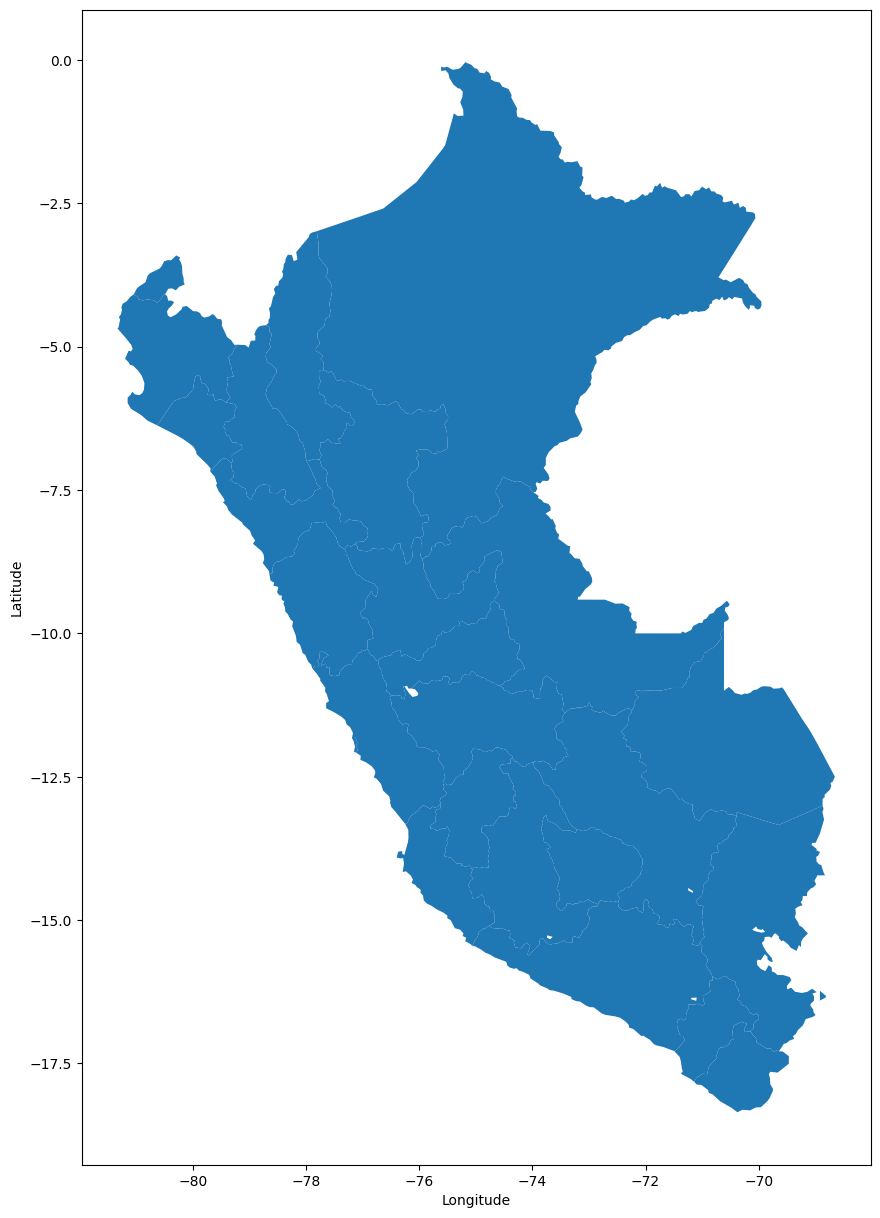

In [13]:
ax = region_geojson.plot(figsize=(15,15))
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()


In [14]:
# columnas esperadas
cat_col, reg_col, lat_col, lon_col = (
    'CATEGOR√çA FINAL (con respuesta de UGEL)', 'Regi√≥n', 'Latitud', 'Longitud'
)

# normalizador (min√∫sculas, sin acentos)
norm = lambda s: (
    ''.join(ch for ch in unicodedata.normalize('NFKD', str(s).strip().lower())
            if not unicodedata.combining(ch))
    if pd.notna(s) else ''
)

# resumen por regi√≥n (total y "muy alta/o")
# Normaliza los nombres de regi√≥n y categor√≠a en el DataFrame principal
df = df.assign(
    _reg_norm=df[reg_col].map(norm),   # columna auxiliar: regi√≥n normalizada (min√∫sculas, sin tildes)
    _cat_norm=df[cat_col].map(norm)    # columna auxiliar: categor√≠a normalizada
)
# Esto se hace para evitar problemas de may√∫sculas/min√∫sculas o tildes en los nombres al agrupar

# Calcula resumen por regi√≥n:
# - total: cantidad de locales por regi√≥n
# - muy_alta: cantidad de locales con categor√≠a "Muy Alta" por regi√≥n
# - prop_muy_alta: proporci√≥n de "Muy Alta" sobre el total de la regi√≥n
resumen = (
    df.assign(muy=df['_cat_norm'].str.contains('muy alt', na=False))  # marca boolean para "muy alta"
      # assign crea una nueva columna 'muy' que es True si '_cat_norm' contiene 'muy alt'
      .groupby('_reg_norm')
      .agg(
          total=(reg_col, 'size'),
          muy_alta=('muy', 'sum')
        # Se usa 'size' en lugar de 'count' porque 'size' cuenta el n√∫mero total de filas en el grupo, incluyendo los valores nulos en la columna agrupada.
        # En cambio, 'count' solo cuenta los valores NO nulos en la columna especificada.
        # As√≠, si hay valores nulos en la columna 'Regi√≥n', 'size' igual los incluye en el total del grupo, mientras que 'count' los omitir√≠a.
        # En este caso, queremos el total de locales por regi√≥n (incluyendo posibles nulos), por eso se prefiere 'size'. muy_alta=('muy', 'sum')
      )
      .assign(prop_muy_alta=lambda d: d['muy_alta'] / d['total'])
      .reset_index()
      .rename(columns={'_reg_norm': 'reg_norm'})
)

# top regiones por n√∫mero de "Muy Alta"
top = resumen.sort_values('muy_alta', ascending=False).head(10).reset_index(drop=True)
display(top)

reg_norm  total  muy_alta  prop_muy_alta
0       ancash   7024      1232       0.175399
1  la libertad   8147      1146       0.140665
2         lima  30679      1012       0.032987
3    cajamarca  11624       819       0.070458
4        junin   7736       708       0.091520
5       loreto   6568       586       0.089220
6        piura   8260       582       0.070460
7        cusco   7744       560       0.072314
8         puno   8575       548       0.063907
9     ayacucho   4985       429       0.086058

In [15]:
region_geojson.head(3)

NOMBDEP  COUNT FIRST_IDDP     HECTARES  \
0  AMAZONAS     84         01  3930646.567   
1    ANCASH    166         02  3596224.600   
2  APURIMAC     80         03  2111415.170   

                                            geometry  
0  POLYGON ((-77.75893 -6.96451, -77.84586 -6.976...  
1  POLYGON ((-77.31749 -8.53015, -77.28903 -8.589...  
2  POLYGON ((-72.47177 -14.6614, -72.57725 -14.68...

NOMBDEP  COUNT FIRST_IDDP     HECTARES  \
0  AMAZONAS     84         01  3930646.567   
1    ANCASH    166         02  3596224.600   
2  APURIMAC     80         03  2111415.170   

                                            geometry _name_norm  reg_norm  \
0  POLYGON ((-77.75893 -6.96451, -77.84586 -6.976...   amazonas  amazonas   
1  POLYGON ((-77.31749 -8.53015, -77.28903 -8.589...     ancash    ancash   
2  POLYGON ((-72.47177 -14.6614, -72.57725 -14.68...   apurimac  apurimac   

   total  muy_alta  prop_muy_alta  
0   3953       404       0.102201  
1   7024      1232       0.175399  
2   3500       171       0.048857

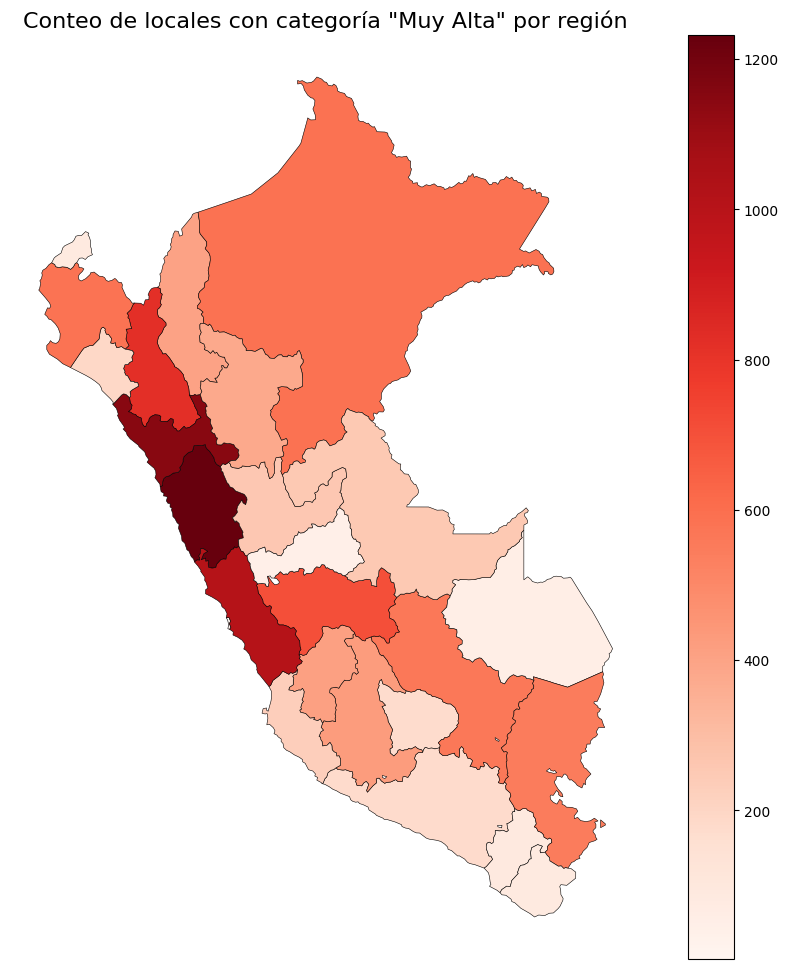

In [16]:
# crear columna normalizada con la funci√≥n 'norm' definida antes
region_geojson['_name_norm'] = region_geojson["NOMBDEP"].astype(str).map(norm)

# unir resumen con geojson
#  - left_on: columna del GeoDataFrame (regi√≥n normalizada)
#  - right_on: columna del DataFrame resumen (regi√≥n normalizada)
#  - how='left': mantener todas las regiones del geojson, incluso si no tienen locales
#  - fillna: rellenar NaN en conteos con 0 (regiones sin locales)
merged = (region_geojson.merge(resumen, left_on='_name_norm', right_on='reg_norm', how='left')
                      .fillna({'muy_alta':0, 'prop_muy_alta':0}))

display(merged.head(3))

# mapa: conteo absoluto de "Muy Alta"
fig, ax = plt.subplots(figsize=(12,12))
merged.plot(column='muy_alta', cmap='Reds', legend=True, ax=ax, edgecolor='black', linewidth=0.4)
ax.set_title('Conteo de locales con categor√≠a "Muy Alta" por regi√≥n', fontsize=16)
ax.set_axis_off()
plt.show()

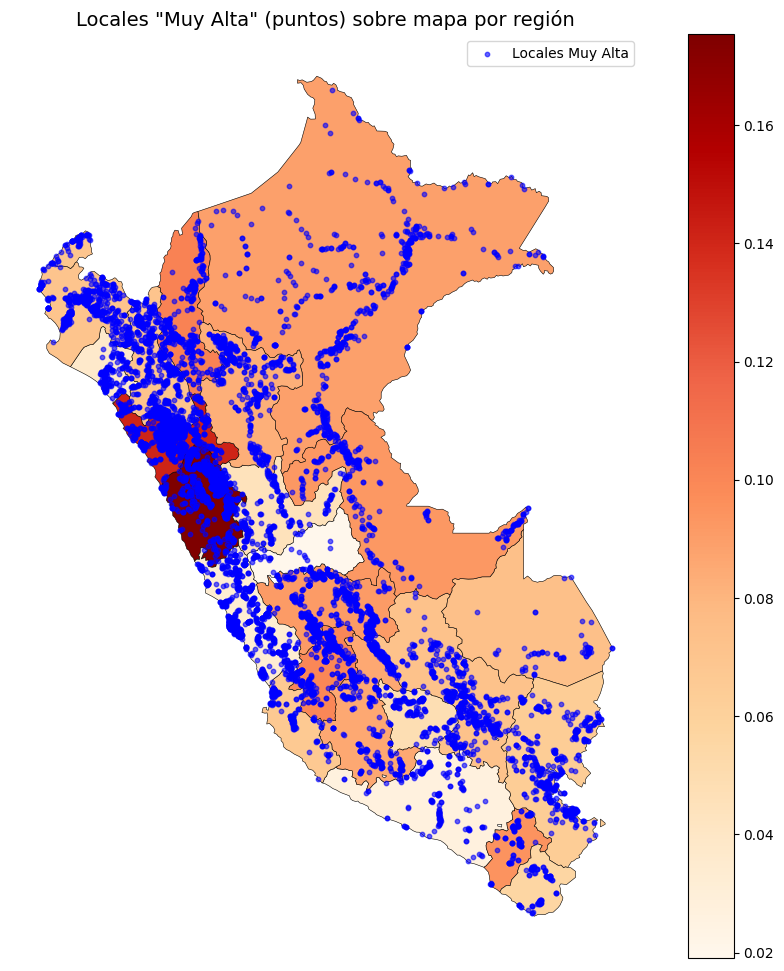

In [17]:
# overlay de puntos "Muy Alta" (si hay lat/lon v√°lidas)
tmp = (df.loc[df['_cat_norm'].str.contains('muy alt', na=False), [lat_col, lon_col]]
         .apply(pd.to_numeric, errors='coerce').dropna())

# Filtrar puntos fuera de los l√≠mites del mapa (usando bounds del GeoDataFrame de regiones)
minx, miny, maxx, maxy = region_geojson.total_bounds
# buffer en grados (ajusta si es necesario); 0.5 grados ~= 50 km en latitud
# El siguiente filtro elimina puntos cuyas coordenadas est√°n fuera de los l√≠mites del mapa de Per√∫.
# Se usan los l√≠mites (bounds) del GeoDataFrame de regiones, y se agrega un peque√±o buffer (0.5 grados)
# para incluir puntos cercanos al borde. As√≠, solo se mantienen los puntos (locales "Muy Alta")
# que efectivamente caen dentro del √°rea geogr√°fica representada en el mapa.
buffer = 0.5
lon_min, lon_max = minx - buffer, maxx + buffer
lat_min, lat_max = miny - buffer, maxy + buffer
tmp = tmp[(tmp[lon_col] >= lon_min) & (tmp[lon_col] <= lon_max) &
          (tmp[lat_col] >= lat_min) & (tmp[lat_col] <= lat_max)]

gdf_pts = gpd.GeoDataFrame(tmp, geometry=gpd.points_from_xy(tmp[lon_col], tmp[lat_col]), crs='EPSG:4326')
fig, ax = plt.subplots(figsize=(12,12))
merged.plot(column='prop_muy_alta', cmap='OrRd', legend=True, ax=ax, edgecolor='black', linewidth=0.4)
gdf_pts.plot(ax=ax, color='blue', markersize=10, alpha=0.6, label='Locales Muy Alta')
ax.set_title('Locales "Muy Alta" (puntos) sobre mapa por regi√≥n', fontsize=14)
ax.set_axis_off(); ax.legend(); 
plt.show()

## 3. An√°lisis descriptivo

- Gr√°fico: porcentaje de locales por `Tipo de Gesti√≥n` y `CATEGOR√çA FINAL`.  
- Distribuci√≥n del `% de aulas para sustituir` seg√∫n `Regi√≥n`.

**Preguntas:**  
> a) ¬øQu√© tipo de gesti√≥n concentra m√°s locales ‚ÄúMuy Altos‚Äù?  
> b) ¬øQu√© regi√≥n tiene mayor mediana de `% de aulas para sustituir`?

---

In [18]:
# Quitamos registros sin categor√≠a final

copy = df[df["CATEGOR√çA FINAL (con respuesta de UGEL)"] != "nan"][["CATEGOR√çA FINAL (con respuesta de UGEL)", '% Aulas para sustituir - CIE  - BM -', 'Tipo de Gesti√≥n']]
copy.head(10)

CATEGOR√çA FINAL (con respuesta de UGEL)  \
0                                 3. Medio   
1                                 3. Medio   
2                                 3. Medio   
4                                 3. Medio   
5                                 3. Medio   
7                                 3. Medio   
8                                  2. Alto   
9                                 3. Medio   
10                                 2. Alto   
11                                3. Medio   

   % Aulas para sustituir - CIE  - BM -             Tipo de Gesti√≥n  
0                                   nan  P√∫blica de Gesti√≥n directa  
1                                   13%  P√∫blica de Gesti√≥n directa  
2                                   60%  P√∫blica de Gesti√≥n directa  
4                                   nan  P√∫blica de Gesti√≥n directa  
5                                   nan  P√∫blica de Gesti√≥n directa  
7                                   20%  P√∫blica de Gesti√≥n directa  
8                                   nan  P√∫blica de Gesti√≥n directa  
9                                   nan  P√∫blica de Gesti√≥n directa  
10                                   7%  P√∫blica de Gesti√≥n privada  
11                                  33%  P√∫blica de Gesti√≥n directa

In [19]:
# Gr√°fico: cantidad de locales por Tipo de Gesti√≥n y CATEGOR√çA FINAL
tabla_tg_cat = (copy
    .groupby(['Tipo de Gesti√≥n','CATEGOR√çA FINAL (con respuesta de UGEL)'])
    .size()
    .reset_index(name='n')
    .sort_values(['Tipo de Gesti√≥n','n'], ascending=[True,False])
)

# Agrega columna 'total' con el total por Tipo de Gesti√≥n
tabla_tg_cat['total'] = tabla_tg_cat.groupby('Tipo de Gesti√≥n')['n'].transform('sum')
# Calcula el porcentaje sobre el total de cada tipo de gesti√≥n
tabla_tg_cat['porcentaje'] = (tabla_tg_cat['n'] / tabla_tg_cat['total']) * 100
display(tabla_tg_cat.head(20))

Tipo de Gesti√≥n CATEGOR√çA FINAL (con respuesta de UGEL)      n  \
2                      Privada                                3. Medio    110   
1                      Privada                                 2. Alto     80   
0                      Privada                             1. Muy Alto     20   
3                      Privada                                 4. Bajo     13   
6   P√∫blica de Gesti√≥n directa                                3. Medio  31396   
5   P√∫blica de Gesti√≥n directa                                 2. Alto  20729   
4   P√∫blica de Gesti√≥n directa                             1. Muy Alto  10482   
7   P√∫blica de Gesti√≥n directa                                 4. Bajo   2143   
10  P√∫blica de Gesti√≥n privada                                3. Medio    445   
9   P√∫blica de Gesti√≥n privada                                 2. Alto    242   
8   P√∫blica de Gesti√≥n privada                             1. Muy Alto     62   
11  P√∫blica de Gesti√≥n privada                                 4. Bajo     41   

    total  porcentaje  
2     223   49.327354  
1     223   35.874439  
0     223    8.968610  
3     223    5.829596  
6   64750   48.488031  
5   64750   32.013900  
4   64750   16.188417  
7   64750    3.309653  
10    790   56.329114  
9     790   30.632911  
8     790    7.848101  
11    790    5.189873

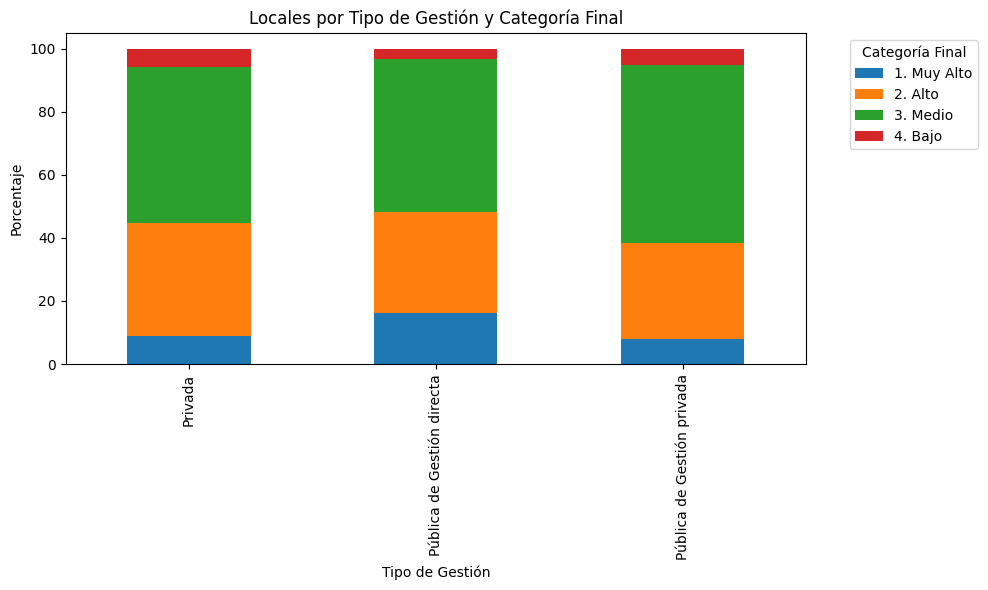

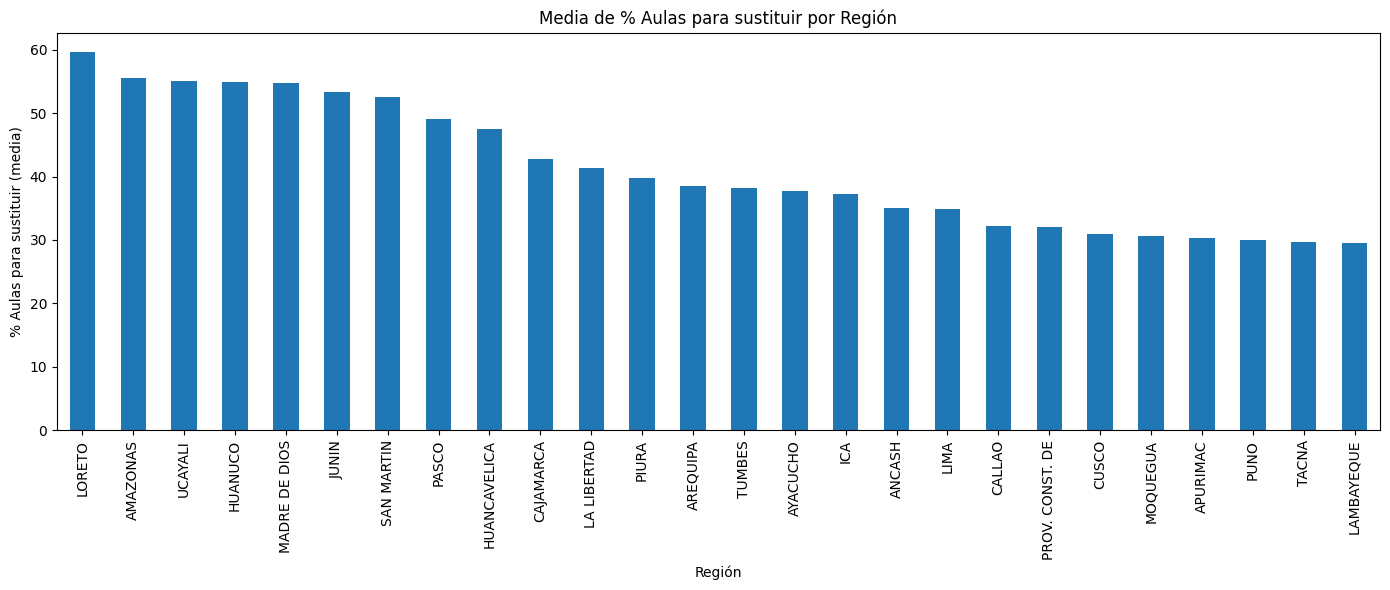

In [20]:
# (opcional) gr√°fico simple apilado por tipo de gesti√≥n
pivot_tg_cat = tabla_tg_cat.pivot(index='Tipo de Gesti√≥n',
                                columns='CATEGOR√çA FINAL (con respuesta de UGEL)',
                                values='porcentaje').fillna(0)
pivot_tg_cat.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Locales por Tipo de Gesti√≥n y Categor√≠a Final')
plt.ylabel('Porcentaje'); plt.xlabel('Tipo de Gesti√≥n')
plt.legend(title='Categor√≠a Final', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout(); plt.show()


# Asegurarse de que la columna es num√©rica
df['% Aulas para sustituir - CIE  - BM -'] = (
    df['% Aulas para sustituir - CIE  - BM -']
    .astype(str).str.replace('%','', regex=False).str.replace(',','.', regex=False)
    .replace({'': np.nan, 'nan': np.nan})
    .astype(float)
)
mean_by_region = df.groupby('Regi√≥n')['% Aulas para sustituir - CIE  - BM -'].mean().sort_values(ascending=False)
plt.figure(figsize=(14, 6))
mean_by_region.plot(kind='bar')
plt.xticks(rotation=90)
plt.title('Media de % Aulas para sustituir por Regi√≥n')
plt.ylabel('% Aulas para sustituir (media)')
plt.xlabel('Regi√≥n')
plt.tight_layout()
plt.show()

## 4. Agrupaci√≥n por regi√≥n

- Agrupar por `Regi√≥n` calculando:
  - Promedio de **riesgo de deslizamiento**, **inundaci√≥n** e **infraestructura**.  
  - Porcentaje de locales ‚ÄúAltos‚Äù o ‚ÄúMuy Altos‚Äù.

**Preguntas:**  
> a) ¬øQu√© regi√≥n presenta mayor riesgo promedio de deslizamiento?  
> b) ¬øQu√© porcentaje de locales ‚ÄúAltos/Muy Altos‚Äù hay en cada regi√≥n?

---

In [21]:
df_new = df.copy()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151548 entries, 0 to 151547
Data columns (total 65 columns):
 #   Column                                                   Non-Null Count   Dtype  
---  ------                                                   --------------   -----  
 0   C√≥digo modular                                           151548 non-null  object 
 1   Anexo                                                    151548 non-null  object 
 2   C√≥digo de Local                                          151548 non-null  object 
 3   Cantidad de IIEE que comparten el mismo local escolar    151548 non-null  object 
 4   Nombre del Centro Educativo                              151548 non-null  object 
 5   C√≥digo modalidad                                         151548 non-null  object 
 6   Modalidad                                                151548 non-null  object 
 7   Forma                                                    151548 non-null  object 
 8   Caracter√≠s

In [22]:
df_new[['Infraestructura: Nivel I (muy mala) - CIE -',
          'Infraestructura: Nivel II (mala) - CIE -',
          'Infraestructura: Nivel III (regular o buena) - CIE -']]

Infraestructura: Nivel I (muy mala) - CIE -  \
0                                                0   
1                                                0   
2                                                1   
3                                              nan   
4                                                0   
...                                            ...   
151543                                         nan   
151544                                         nan   
151545                                         nan   
151546                                         nan   
151547                                           1   

       Infraestructura: Nivel II (mala) - CIE -  \
0                                             0   
1                                             1   
2                                             0   
3                                           nan   
4                                             1   
...                                         ...   
151543                                      nan   
151544                                      nan   
151545                                      nan   
151546                                      nan   
151547                                        0   

       Infraestructura: Nivel III (regular o buena) - CIE -  
0                                                       1    
1                                                       0    
2                                                       0    
3                                                     nan    
4                                                       0    
...                                                   ...    
151543                                                nan    
151544                                                nan    
151545                                                nan    
151546                                                nan    
151547                                                  0    

[151548 rows x 3 columns]

In [23]:
# Infraestructura I/II/III suelen ser S√≠/No ‚Üí 1/0
for n in ['Infraestructura: Nivel I (muy mala) - CIE -',
          'Infraestructura: Nivel II (mala) - CIE -',
          'Infraestructura: Nivel III (regular o buena) - CIE -']:
    df_new[n] = (df_new[n]
                    .apply(pd.to_numeric, errors='coerce'))

# Promedios por Regi√≥n
agg_cols = ['Riesgo de Deslizamiento (5 muy alto) - INGEMMET -',
    'Inundaci√≥n 1:100,000 (5 Muy alta) - INGEMMET -', 
    'Infraestructura: Nivel I (muy mala) - CIE -',
    'Infraestructura: Nivel I (muy mala) - CIE -',
    'Infraestructura: Nivel II (mala) - CIE -',
    'Infraestructura: Nivel III (regular o buena) - CIE -']

agg_region_prom = (df_new
    .groupby('Regi√≥n')[agg_cols]
    .mean(numeric_only=True)
    .round(2)
)
display(agg_region_prom.head(10))

# % locales "Alto/Muy Alto" por Regi√≥n
mask_altos = df_new['CATEGOR√çA FINAL (con respuesta de UGEL)'].astype(str).str.upper().isin(['2. ALTO','1. MUY ALTO'])
resumen_altos = (df_new.assign(alto_muy_alto=mask_altos)
   .groupby('Regi√≥n')
   .agg(n_locales=('alto_muy_alto','size'),
        n_alto_muy_alto=('alto_muy_alto','sum'))
   .assign(pct_alto_muy_alto=lambda d: (d['n_alto_muy_alto']/d['n_locales']*100).round(2))
   .sort_values('pct_alto_muy_alto', ascending=False)
)
display(resumen_altos.head(10))


Infraestructura: Nivel I (muy mala) - CIE -  \
Regi√≥n                                                      
AMAZONAS                                             0.49   
ANCASH                                               0.20   
APURIMAC                                             0.23   
AREQUIPA                                             0.25   
AYACUCHO                                             0.24   
CAJAMARCA                                            0.46   
CALLAO                                               0.06   
CUSCO                                                0.17   
HUANCAVELICA                                         0.37   
HUANUCO                                              0.48   

              Infraestructura: Nivel I (muy mala) - CIE -  \
Regi√≥n                                                      
AMAZONAS                                             0.49   
ANCASH                                               0.20   
APURIMAC                                             0.23   
AREQUIPA                                             0.25   
AYACUCHO                                             0.24   
CAJAMARCA                                            0.46   
CALLAO                                               0.06   
CUSCO                                                0.17   
HUANCAVELICA                                         0.37   
HUANUCO                                              0.48   

              Infraestructura: Nivel II (mala) - CIE -  \
Regi√≥n                                                   
AMAZONAS                                          0.21   
ANCASH                                            0.48   
APURIMAC                                          0.60   
AREQUIPA                                          0.32   
AYACUCHO                                          0.52   
CAJAMARCA                                         0.28   
CALLAO                                            0.65   
CUSCO                                             0.58   
HUANCAVELICA                                      0.32   
HUANUCO                                           0.23   

              Infraestructura: Nivel III (regular o buena) - CIE -  
Regi√≥n                                                              
AMAZONAS                                                   0.24     
ANCASH                                                     0.26     
APURIMAC                                                   0.14     
AREQUIPA                                                   0.30     
AYACUCHO                                                   0.18     
CAJAMARCA                                                  0.20     
CALLAO                                                     0.29     
CUSCO                                                      0.20     
HUANCAVELICA                                               0.23     
HUANUCO                                                    0.20

n_locales  n_alto_muy_alto  pct_alto_muy_alto
Regi√≥n                                                     
SAN MARTIN         4589             1538              33.51
ANCASH             7024             2315              32.96
LA LIBERTAD        8147             2609              32.02
HUANCAVELICA       4137             1235              29.85
AYACUCHO           4985             1480              29.69
JUNIN              7736             2264              29.27
AMAZONAS           3953             1113              28.16
PUNO               8575             2328              27.15
CUSCO              7744             2024              26.14
TUMBES             1240              317              25.56

## 5. Correlaciones

- Calcular y graficar la **correlaci√≥n** entre:
  - `% Aulas para sustituir`,  
  - `Riesgo de Deslizamiento`,  
  - `Infraestructura Nivel I/II/III`,  
  - `CATEGOR√çA FINAL (ordinal)`.

**Pregunta:**  
> ¬øQu√© variable tiene la mayor correlaci√≥n con la categor√≠a final de vulnerabilidad?


In [24]:
# Preparar num√©ricas
cand = ['Riesgo de Deslizamiento (5 muy alto) - INGEMMET -',
            'Inundaci√≥n 1:100,000 (5 Muy alta) - INGEMMET -',
            '% Aulas para sustituir - CIE  - BM -', 
            'Infraestructura: Nivel I (muy mala) - CIE -',
            'Infraestructura: Nivel II (mala) - CIE -',
            'Infraestructura: Nivel III (regular o buena) - CIE -']

# Convertir 'CATEGOR√çA FINAL (con respuesta de UGEL)' a ordinal num√©rico si existe y no est√° ya en cand
ord_map = {'5. MUY BAJO': 1, '4. BAJO': 2, '3. MEDIO': 3, '2. ALTO': 4, '1. MUY ALTO': 5}
cat_col = 'CATEGOR√çA FINAL (con respuesta de UGEL)'
df_new['cat_final_ord'] = df_new[cat_col].astype(str).str.upper().replace(ord_map)
cand.append('cat_final_ord')

df_new[cand]

Riesgo de Deslizamiento (5 muy alto) - INGEMMET -  \
0                                                      3   
1                                                      3   
2                                                      3   
3                                                    nan   
4                                                      3   
...                                                  ...   
151543                                               nan   
151544                                               nan   
151545                                               nan   
151546                                               nan   
151547                                                 3   

       Inundaci√≥n 1:100,000 (5 Muy alta) - INGEMMET -  \
0                                                   4   
1                                                   4   
2                                                   4   
3                                                 nan   
4                                                   2   
...                                               ...   
151543                                            nan   
151544                                            nan   
151545                                            nan   
151546                                            nan   
151547                                              1   

        % Aulas para sustituir - CIE  - BM -  \
0                                        NaN   
1                                       13.0   
2                                       60.0   
3                                        NaN   
4                                        NaN   
...                                      ...   
151543                                   NaN   
151544                                   NaN   
151545                                   NaN   
151546                                   NaN   
151547                                  71.0   

        Infraestructura: Nivel I (muy mala) - CIE -  \
0                                               0.0   
1                                               0.0   
2                                               1.0   
3                                               NaN   
4                                               0.0   
...                                             ...   
151543                                          NaN   
151544                                          NaN   
151545                                          NaN   
151546                                          NaN   
151547                                          1.0   

        Infraestructura: Nivel II (mala) - CIE -  \
0                                            0.0   
1                                            1.0   
2                                            0.0   
3                                            NaN   
4                                            1.0   
...                                          ...   
151543                                       NaN   
151544                                       NaN   
151545                                       NaN   
151546                                       NaN   
151547                                       0.0   

        Infraestructura: Nivel III (regular o buena) - CIE - cat_final_ord  
0                                                     1.0                3  
1                                                     0.0                3  
2                                                     0.0                3  
3                                                     NaN              NAN  
4                                                     0.0                3  
...                                                   ...              ...  
151543                                                NaN              NAN  
151544                                                NaN              NAN  
151545                                      

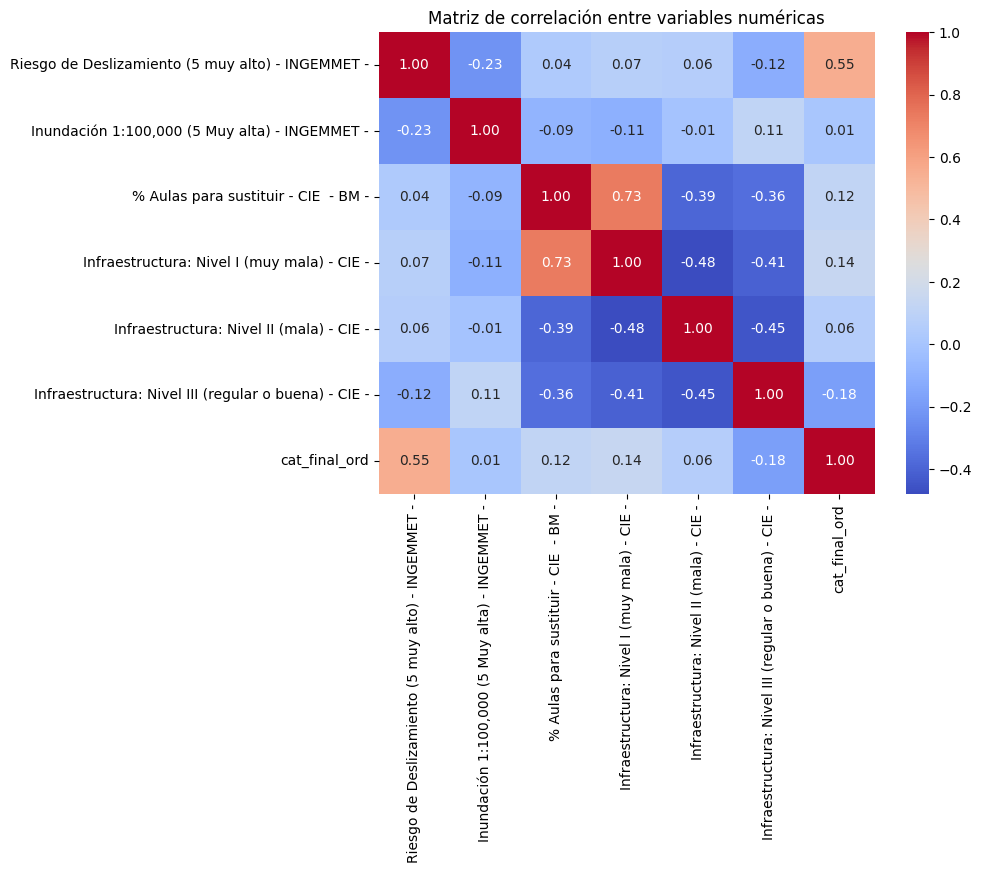

In [25]:
num = df_new[cand].copy()
corr = num.corr().round(2)

# Gr√°fico de calor de la matriz de correlaci√≥n
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlaci√≥n entre variables num√©ricas')
plt.show()
